In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

import mlgrad.regr as regr
import mlgrad.model as model
import mlgrad.func as func

In [3]:
digits = load_digits()

In [82]:
Y = digits.target
X = digits.data

In [84]:
I1 = (Y == 1)
I7 = (Y == 7)
IX = (Y != 1) & (Y != 7)
X1 = X[I1]
Y1 = np.ones(len(X1), 'd')
X7 = X[I7]
Y7 = -np.ones(len(X7), 'd')
XX = X[IX]
YX = np.zeros(len(XX), 'd')

X17 = np.concatenate((X1, X7, XX), axis=0)
Y17 = np.concatenate((Y1, Y7, YX))

N = len(Y17)
print(X17.shape, Y17.shape)

(1797, 64) (1797,)


In [85]:
for i in range(N):
    X17[i] = scale(X17[i])

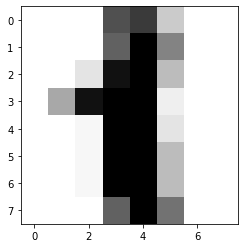

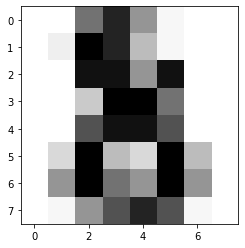

In [86]:
plt.imshow(X17[0].reshape(8,8), plt.cm.Greys)
plt.show()
plt.imshow(X17[-1].reshape(8,8), plt.cm.Greys)
plt.show()

In [87]:
def sigma_neuron_layer(n_input, n_output):
    outfunc = func.Sigmoidal()
    layer = model.SigmaNeuronModelLayer(outfunc, n_input, n_output)
    return layer

In [88]:
def create_nn(n_input, n_hidden):
    layer1 = sigma_neuron_layer(n_input, n_hidden)

    body = model.FFNetworkModel()
    body.add(layer1)

    head = model.LinearModel(n_hidden)
    ffnn = model.FFNetworkFuncModel(head, body)
    ffnn.allocate()
    return ffnn

In [205]:
ffnn_sq = create_nn(64, 5)
ffnn_sq.param[:] = np.random.random(ffnn_sq.n_param)

In [ ]:
lr = regr.regression(X17, Y17, ffnn_sq, n_restart=3)

In [ ]:
plt.plot(np.log(lr.lvals))
plt.show()

In [ ]:
Y17_p = ffnn_sq.evaluate_all(X17)

In [ ]:
plt.scatter(Y17, Y17_p, c=Y17)
plt.show()